# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

# Project Start from here

In [494]:
# import data science libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('/Users/yuyakondo/Desktop/Udemy/Python and Machine Learning Bootcamp/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [495]:
# read the data description 

data_info = pd.read_csv('/Users/yuyakondo/Desktop/Udemy/Python and Machine Learning Bootcamp/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/DATA/lending_club_info.csv',
                       index_col='LoanStatNew')

data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [496]:
# see data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [497]:
# check simple statistic 

df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.89,8357.44,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.64,4.47,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.85,250.73,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.18,61637.62,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.38,18.02,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.31,5.14,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.18,0.53,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.54,20591.84,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.79,24.45,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.41,11.89,2.00,17.00,24.00,32.00,151.00


# Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

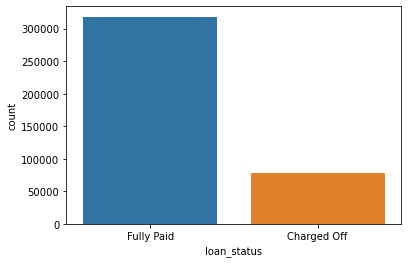

In [498]:
# create countplot for current loan status customers

sns.countplot(x = 'loan_status', data = df)

<AxesSubplot:xlabel='purpose', ylabel='count'>

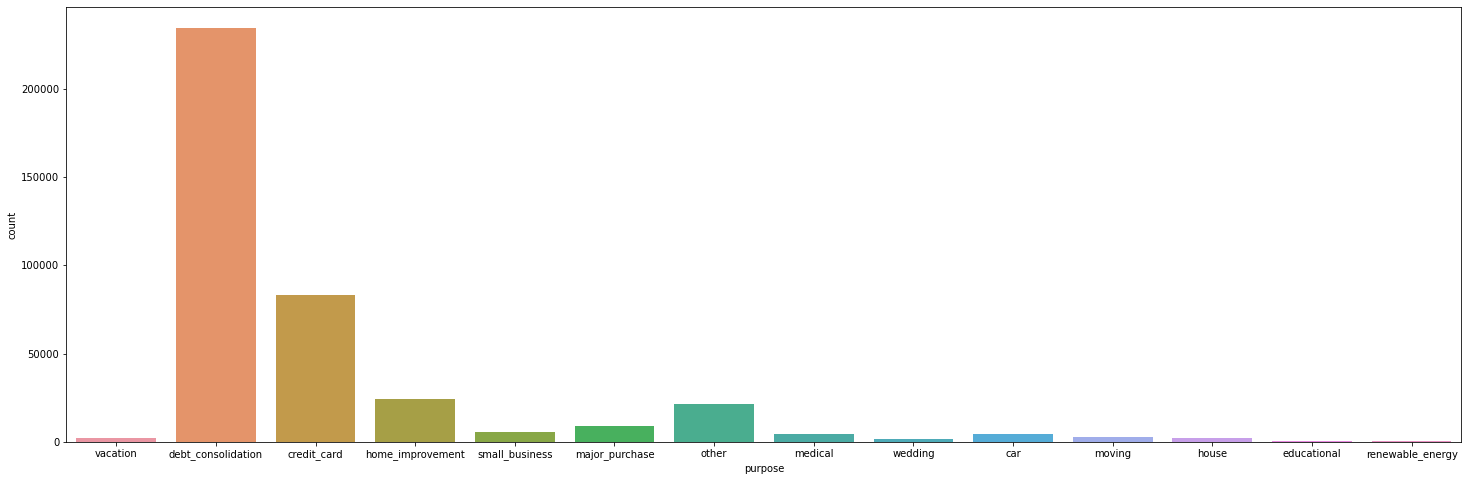

In [499]:
# what are the purpose of taking the loans? 

plt.figure(figsize = (25,8))
sns.countplot(x = 'purpose', data = df)

/Users/yuyakondo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

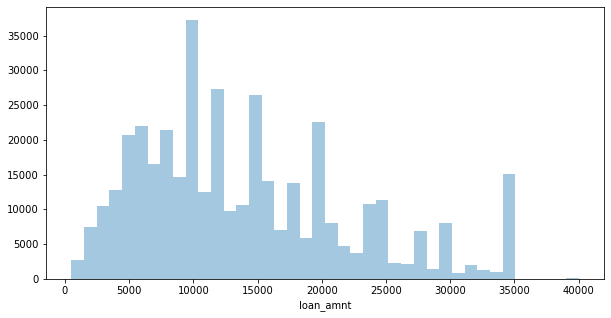

In [500]:
# create distribution plot for the loan amount 

plt.figure(figsize = (10,5))
sns.distplot(df['loan_amnt'], kde = False, bins = 40)

In [501]:
# Find are there any correlation between continuous variables 

df.corr('pearson')

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [502]:
# see any loan_amnt correlation 

df.corr('pearson')['loan_amnt'].sort_values()

pub_rec_bankruptcies   -0.106539
pub_rec                -0.077779
dti                     0.016636
revol_util              0.099911
int_rate                0.168921
open_acc                0.198556
mort_acc                0.222315
total_acc               0.223886
revol_bal               0.328320
annual_inc              0.336887
installment             0.953929
loan_amnt               1.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:>

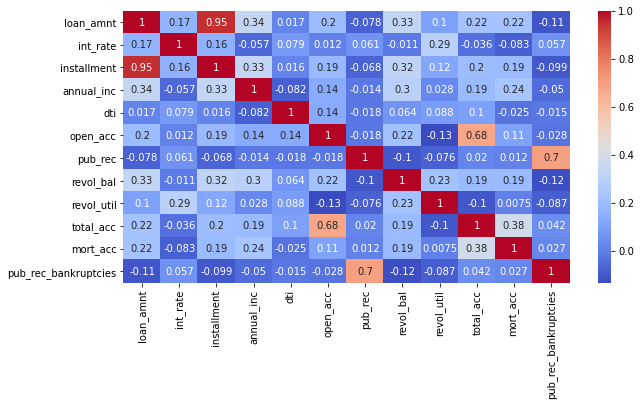

In [503]:
# We create the correlation table but is hard to analyze. Let's visualise itusing heatmap ! 

corr = df.corr('pearson')

plt.figure(figsize = (10,5))
sns.heatmap(corr, data = df, cmap = 'coolwarm', annot = True)

Based on the results, there are strong correlation between loan_amnt and installment, 95% associated. There are another features that have reasonable correlation, which are open_acc and total_acc, about 68% associated. 

Another one is pub_acc and pub_acc_bankruptcies, which is 70%. This does make sense because we know customer who have bad record have higher chance to get bankruptcy.

We figure it out that installment feature had almost perfect correlation. Let's explore this feature more.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

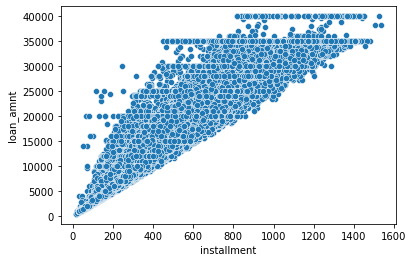

In [504]:
# create scatter plot for the installment 

sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

<AxesSubplot:xlabel='open_acc', ylabel='total_acc'>

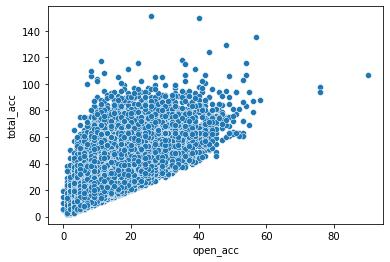

In [505]:
# explore other features correlation (open_acc vs total_acc)
sns.scatterplot(x = 'open_acc', y = 'total_acc', data = df)

<AxesSubplot:xlabel='pub_rec', ylabel='pub_rec_bankruptcies'>

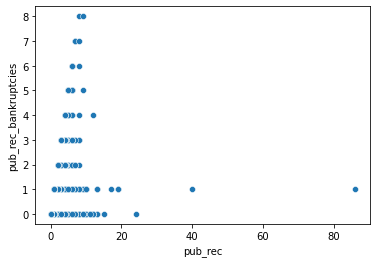

In [506]:
# scatterplot for pub_rec and pub_rec_bankruptcy 

sns.scatterplot(data = df, x = 'pub_rec', y = 'pub_rec_bankruptcies')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

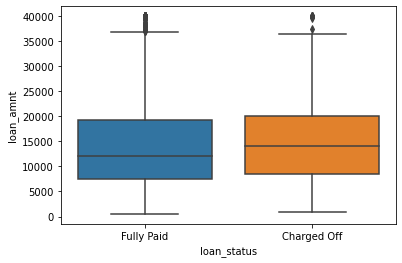

In [507]:
# Use bxoplot to see assocation between loan_amnt and loan_status

sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [508]:
df.groupby('loan_status')['loan_amnt'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.30,8505.09,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.88,8302.32,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [509]:
# what is the unique value for the grade? 

sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [510]:
# what is unoque value for the subgrades? 

sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

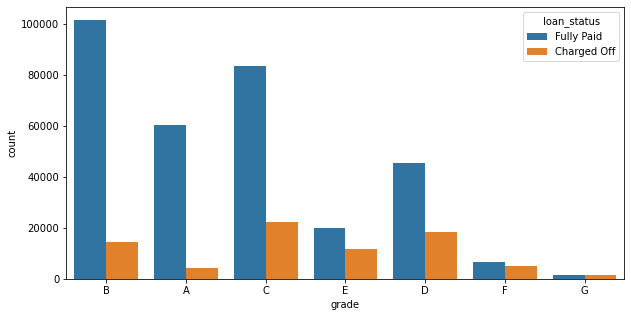

In [511]:
# create countplot to display grade and loan_status

plt.figure(figsize = (10,5))
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

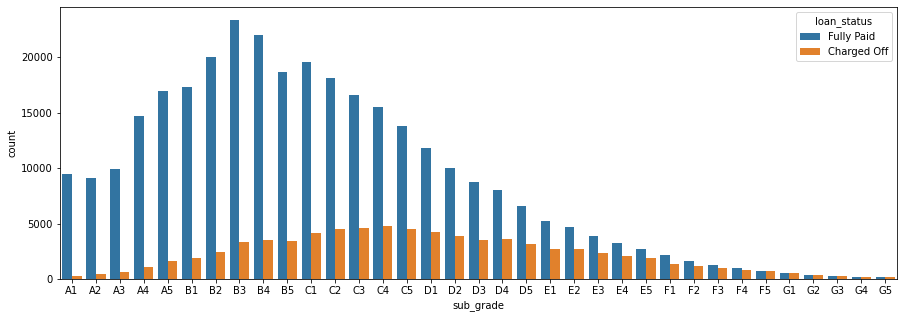

In [512]:
# create countplot for the subgrade and loan_status 

# sort the subgrade 

sub_grade_order = sorted(df['sub_grade'].unique())

plt.figure(figsize = (15,5))

sns.countplot(x = 'sub_grade', data = df, hue = 'loan_status', order = sub_grade_order)

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

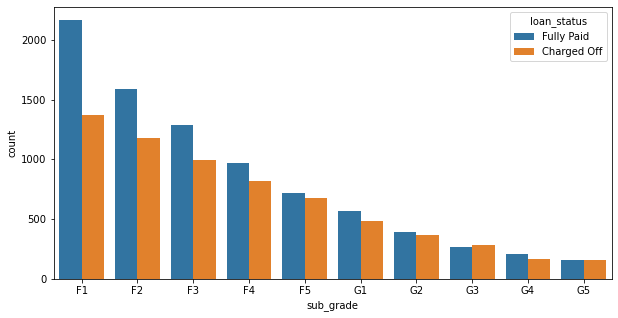

In [513]:
# grab only grade G and F
grade_F_to_G = df[(df['grade']=='G') | (df['grade']=='F')]

# create the countplot 
subgrade_order_F_G = sorted(grade_F_to_G['sub_grade'].unique())

#create countplot 
plt.figure(figsize =(10,5) )
sns.countplot(x = 'sub_grade', data = grade_F_to_G, order = subgrade_order_F_G, hue = 'loan_status')


**TASK: Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [514]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [515]:
df['loan_repaid'] = df['loan_status'].map(({'Fully Paid': 1, 'Charged Off' :0}))

In [516]:
# check the result

df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

<AxesSubplot:>

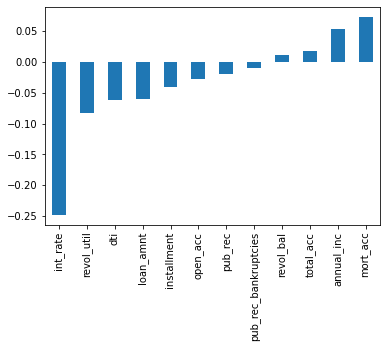

In [517]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Section 2: Data Preprocessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

In [518]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [519]:
# length of data 

len(df)

396030

In [520]:
# See are there any missing data 

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [521]:
# conver into percentage to see how much missing data contain 

df.isnull().sum() * 100 / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [522]:
# function to read feature and description 

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function.**

In [523]:
# print out emp_title description

feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [524]:
# print out emp_length description

feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [525]:
len(df['emp_title'].unique())

173106

In [526]:
# how many people for each occupation?

df['emp_title'].value_counts()

Teacher                  4389
Manager                  4250
Registered Nurse         1856
RN                       1846
Supervisor               1830
                         ... 
Marsh Trucking              1
NEMT, Inc.                  1
Independant Sales Rep       1
Aircraft attendant          1
Express LLC                 1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [527]:
# remove the emp_title column from the data

df = df.drop('emp_title', axis = 1)


**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [528]:
# sort the emp_length and remove the Nan

sort_emp_length = sorted(df['emp_length'].dropna().unique())

In [529]:
# sort the order

sort_emp_length = ['< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

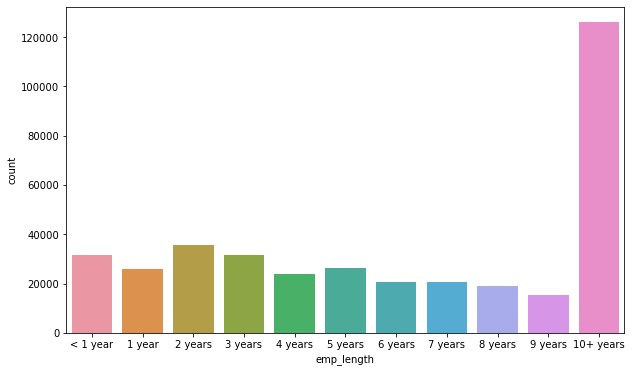

In [530]:
# create the countplot for emp_length with sorted order

plt.figure(figsize = (10, 6))
sns.countplot(x = 'emp_length', data = df, order = sort_emp_length)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

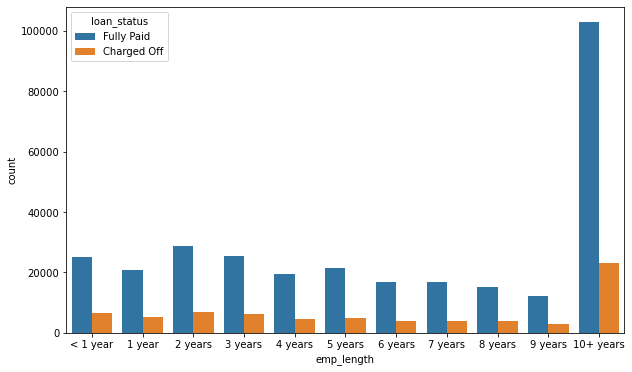

In [531]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'emp_length', data = df, order = sort_emp_length, hue = 'loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [532]:
# groupby the _loan status (Fully paid and charged off ) and emp_length

# groupby the Fully paid with emp_length
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']


# groupby the charged off with emp_length
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

# calculate the pecentage 

emp_length = emp_co/emp_fp

# show the result with rounded 
emp_length.round(2)

emp_length
1 year       0.25
10+ years    0.23
2 years      0.24
3 years      0.24
4 years      0.24
5 years      0.24
6 years      0.23
7 years      0.24
8 years      0.25
9 years      0.25
< 1 year     0.26
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

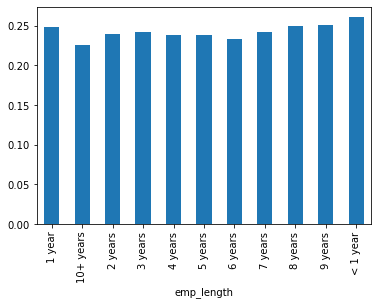

In [533]:
# display the bar graph for emp_length

emp_length.plot(kind = 'bar')

Based on the result, we can see that there are no big differnce between emp_length and charged off the payment. Because we don't see any correlation between the features, we can remove this column.

In [534]:
# drop emp_length column from data 

df = df.drop('emp_length', axis = 1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [535]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [536]:
df[['title', 'purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


Seems title column is just description of the purpose column. Therefore, we can remove the title column from the data.

In [537]:
df = df.drop('title', axis = 1)

In [538]:
# check again missing values

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

There are many missing values in mort_acc. Check the description for this feature.

In [539]:
# definition for mort_acc

feat_info('mort_acc')

Number of mortgage accounts.


In [540]:
# count the number of values in mort_acc

df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc**

In [541]:
# find the correlation between mort_acc and other features 

df.corr('pearson')['mort_acc'].sort_values(ascending = False).round(2)

mort_acc                1.00
total_acc               0.38
annual_inc              0.24
loan_amnt               0.22
revol_bal               0.19
installment             0.19
open_acc                0.11
loan_repaid             0.07
pub_rec_bankruptcies    0.03
pub_rec                 0.01
revol_util              0.01
dti                    -0.03
int_rate               -0.08
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [542]:
# groupby mort_acc and total_acc and find the average

print("Mean of mort_acc column per total_acc")
df.groupby('mort_acc').mean()['total_acc'].round(2)

Mean of mort_acc column per total_acc


mort_acc
0.0     21.26
1.0     24.45
2.0     27.06
3.0     29.19
4.0     31.16
5.0     32.67
6.0     33.91
7.0     35.66
8.0     37.13
9.0     38.38
10.0    39.44
11.0    40.90
12.0    41.48
13.0    41.66
14.0    43.82
15.0    42.46
16.0    43.16
17.0    50.14
18.0    48.00
19.0    47.27
20.0    49.69
21.0    48.25
22.0    55.86
23.0    52.00
24.0    56.00
25.0    50.50
26.0    46.00
27.0    50.67
28.0    42.00
30.0    61.00
31.0    56.50
32.0    55.00
34.0    61.00
Name: total_acc, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [543]:
# calculate the mort_acc average 

total_acc_avg = df.groupby('total_acc').mean()['mort_acc'] 

In [544]:
total_acc_avg[2.0]

0.0

In [545]:
# create the function that when there is missing values in mort_acc column. you will fill in the average of total_acc 
# in total_acc column. Else you return the mort_acc if the value already exist. 

def fill_mort_acc(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [546]:
# fill in the average of total_acc into mort_acc when there is missing values in the column

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [547]:
# check the missing values 
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

We fill in entire missing values of mort_acc and there is no missing value anymore. Now we have revol_util and pub_rec_bankruptcies. Because we checked that these 2 column contain very small amount of entire data, we can just remove both of them.

In [548]:
df.isnull().sum() * 100 / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [549]:
# remove entire missing values

df = df.dropna()

In [550]:
# check again for missing values

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [551]:
# grab entire column with non-numeric

df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 395219 non-null  object
 1   grade                395219 non-null  object
 2   sub_grade            395219 non-null  object
 3   home_ownership       395219 non-null  object
 4   verification_status  395219 non-null  object
 5   issue_d              395219 non-null  object
 6   loan_status          395219 non-null  object
 7   purpose              395219 non-null  object
 8   earliest_cr_line     395219 non-null  object
 9   initial_list_status  395219 non-null  object
 10  application_type     395219 non-null  object
 11  address              395219 non-null  object
dtypes: object(12)
memory usage: 39.2+ MB


---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [552]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [553]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [554]:
# grab first three letter and then convert them into integer 

df['term'] = df['term'].apply(lambda term: int(term[:3]))

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [555]:
df = df.drop('grade', axis = 1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [556]:
# create the dummy variable for sub_grade column
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

In [557]:
# concatinate the sub_grade_dummies column into original sub_grade column 
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

In [558]:
# see the entire column of df
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [559]:
# check the onject type 

df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   home_ownership       395219 non-null  object
 1   verification_status  395219 non-null  object
 2   issue_d              395219 non-null  object
 3   loan_status          395219 non-null  object
 4   purpose              395219 non-null  object
 5   earliest_cr_line     395219 non-null  object
 6   initial_list_status  395219 non-null  object
 7   application_type     395219 non-null  object
 8   address              395219 non-null  object
dtypes: object(9)
memory usage: 30.2+ MB


### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [560]:
# create dummy variable
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first = True)

# drop out original column to avoid duplicate
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1)

# concatinate the dummy variable into original data
df = pd.concat([df, dummies], axis = 1)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [561]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [562]:
# replace None and ANY with OTHER 

df['home_ownership'] = df['home_ownership'].replace(['None', 'ANY'], 'OTHER')

In [563]:
# converting into dummy variables 

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df,dummies],axis=1)

# remove home_ownership 

df = df.drop('home_ownership', axis =1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [564]:
df['address']

# We can see that zipcode contain at last 5 digits 

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [565]:
# grab only last 5 digits

df['zipcode'] = df['address'].apply(lambda term: int(term[-5:]))

In [566]:
df['zipcode']

0         22690
1          5113
2          5113
3           813
4         11650
          ...  
396025    30723
396026     5113
396027    70466
396028    29597
396029    48052
Name: zipcode, Length: 395219, dtype: int64

In [567]:
# create dummy variable 

dummies = pd.get_dummies(df['zipcode'],drop_first=True)

# drop out address column 
df = df.drop(['zipcode', 'address'], axis =1)

# concatinate with orignal data 
df = pd.concat([df,dummies],axis=1)





### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [568]:
feat_info('issue_d')

The month which the loan was funded


In [569]:
# drop issue_d from column

df = df.drop('issue_d', axis = 1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [570]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [571]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [572]:
# grab last 4 digits to display only year 

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [573]:
# now drop the earliest_cr_line feature from the data 

df = df.drop('earliest_cr_line', axis = 1)

# Train Test Split Data

In [574]:
# import sklearn 

from sklearn.model_selection import train_test_split

In [575]:
# drop the load_staus column because we have loan_repaid column since it's already in 0s and 1s

df = df.drop('loan_status', axis = 1)

In [576]:
# Create X variable and y variable 

X = df.drop('loan_repaid', axis =1).values

y = df['loan_repaid']

**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [577]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [578]:
# import library 

from sklearn.preprocessing import MinMaxScaler

In [579]:
# instantiate the MinMaxScaler

scaler = MinMaxScaler()

In [580]:
# fit the X_train and X_test data into MinMaxScaler 

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Creating the model

**Import necessary Keras functions**

In [581]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron**

In [582]:
model = Sequential()

# input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [583]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3047 - val_loss: 0.2665
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2669 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2637 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2621 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2611 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2605 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2596 - val_loss: 0.2618
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2594 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.258

# saving model 

In [584]:
from tensorflow.keras.models import load_model

model.save('TS_and_Keras_project_model.h5')  

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [585]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

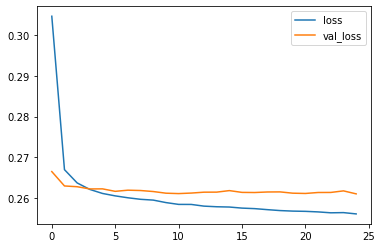

In [586]:
losses[['loss', 'val_loss']].plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [587]:
from sklearn.metrics import classification_report, confusion_matrix

In [588]:
predictions = model.predict_classes(X_test)

/Users/yuyakondo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [589]:
# printout classification report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [590]:
# printout confusion matrix

print(confusion_matrix(y_test, predictions))

[[ 6900  8758]
 [  149 63237]]


**TASK: Given the customer below, would you offer this person a loan?**

In [591]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 79, dtype: float64

In [592]:
model.predict_classes(new_customer.values.reshape(1,79))

/Users/yuyakondo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

**TASK: Now check, did this person actually end up paying back their loan?**

In [593]:
df.iloc[random_ind]['loan_repaid']

1.0